# SNAP in the Past 12 Months by Poverty Status for Households

The data set explored below includes Receipt of Food Stamps/SNAP in the Past 12 Months by Poverty Status in the Past 12 Months for Households in Los Angeles County, CA. 

In [14]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [15]:
SNAP = gpd.read_file('data/SNAP_Household.geojson')

In [16]:
SNAP.shape

(2347, 17)

The code above helps to determine the shape of the data. The results show that there are 2347 rows and 17 columns.

In [17]:
SNAP.head()

,geoid,name,B22003001,"B22003001, Error",B22003002,"B22003002, Error",B22003003,"B22003003, Error",B22003004,"B22003004, Error",B22003005,"B22003005, Error",B22003006,"B22003006, Error",B22003007,"B22003007, Error",geometry
0,05000US06037,"Los Angeles County, CA",3316795.0,5782.0,289808.0,3120.0,124751.0,2332.0,165057.0,2379.0,3026987.0,6699.0,357228.0,4554.0,2669759.0,7582.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,124.0,59.0,37.0,36.0,87.0,53.0,1451.0,105.0,204.0,100.0,1247.0,138.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,0.0,12.0,0.0,12.0,0.0,12.0,1312.0,63.0,87.0,58.0,1225.0,79.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,360.0,128.0,245.0,113.0,115.0,85.0,1937.0,172.0,320.0,169.0,1617.0,202.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,172.0,74.0,55.0,42.0,117.0,61.0,1185.0,76.0,195.0,72.0,990.0,97.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [18]:
SNAP = SNAP.drop([0])

Remove the 0th row from the data set because it totals the entire data set and would create an extreme outlier to when plotting.

In [19]:
SNAP.head()

,geoid,name,B22003001,"B22003001, Error",B22003002,"B22003002, Error",B22003003,"B22003003, Error",B22003004,"B22003004, Error",B22003005,"B22003005, Error",B22003006,"B22003006, Error",B22003007,"B22003007, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,124.0,59.0,37.0,36.0,87.0,53.0,1451.0,105.0,204.0,100.0,1247.0,138.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,0.0,12.0,0.0,12.0,0.0,12.0,1312.0,63.0,87.0,58.0,1225.0,79.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,360.0,128.0,245.0,113.0,115.0,85.0,1937.0,172.0,320.0,169.0,1617.0,202.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,172.0,74.0,55.0,42.0,117.0,61.0,1185.0,76.0,195.0,72.0,990.0,97.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,93.0,72.0,62.0,0.0,12.0,72.0,62.0,1373.0,103.0,113.0,65.0,1260.0,113.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
SNAP.sample()

,geoid,name,B22003001,"B22003001, Error",B22003002,"B22003002, Error",B22003003,"B22003003, Error",B22003004,"B22003004, Error",B22003005,"B22003005, Error",B22003006,"B22003006, Error",B22003007,"B22003007, Error",geometry
258,14000US06037131800,"Census Tract 1318, Los Angeles, CA",1638.0,102.0,132.0,82.0,63.0,58.0,69.0,55.0,1506.0,124.0,144.0,68.0,1362.0,134.0,"MULTIPOLYGON (((-118.53606 34.20839, -118.5347..."


In [20]:
list(SNAP)

['geoid',
 'name',
 'B22003001',
 'B22003001, Error',
 'B22003002',
 'B22003002, Error',
 'B22003003',
 'B22003003, Error',
 'B22003004',
 'B22003004, Error',
 'B22003005',
 'B22003005, Error',
 'B22003006',
 'B22003006, Error',
 'B22003007',
 'B22003007, Error',
 'geometry']

In [21]:
columns_to_keep = ['geoid',
 'name',
 'B22003001',
 'B22003002',
 'B22003003',
 'B22003004',
 'B22003005',
 'B22003006',
 'B22003007',
 'geometry']

In [22]:
SNAP = SNAP[columns_to_keep]

Here, I removed some of the columns that would be unneccesary when plotting and redefined the data

In [23]:
SNAP.head()

,geoid,name,B22003001,B22003002,B22003003,B22003004,B22003005,B22003006,B22003007,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,124.0,37.0,87.0,1451.0,204.0,1247.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,0.0,0.0,0.0,1312.0,87.0,1225.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,360.0,245.0,115.0,1937.0,320.0,1617.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,172.0,55.0,117.0,1185.0,195.0,990.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,72.0,0.0,72.0,1373.0,113.0,1260.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [24]:
SNAP.columns = ['geoid',
 'name',
 'Total',
 'Household received Food Stamps/SNAP',
 'Recieve SNAP, Income below poverty level',
 'Recieve SNAP, Income at or above poverty level',
 'Household did not receive Food Stamps/SNAP in the past 12 months',
 'Do Not recieve SNAP, Income below poverty level',
 'Do Not recieve SNAP, Income at or above poverty level',
 'geometry']

Renaming the columns so that they are more familiar instead of code. These titles were taked from the metadata file that was included with the download of the geojson file.

In [25]:
SNAP.head()

,geoid,name,Total,Household received Food Stamps/SNAP,"Recieve SNAP, Income below poverty level","Recieve SNAP, Income at or above poverty level",Household did not receive Food Stamps/SNAP in the past 12 months,"Do Not recieve SNAP, Income below poverty level","Do Not recieve SNAP, Income at or above poverty level",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,124.0,37.0,87.0,1451.0,204.0,1247.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,0.0,0.0,0.0,1312.0,87.0,1225.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,360.0,245.0,115.0,1937.0,320.0,1617.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,172.0,55.0,117.0,1185.0,195.0,990.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,72.0,0.0,72.0,1373.0,113.0,1260.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


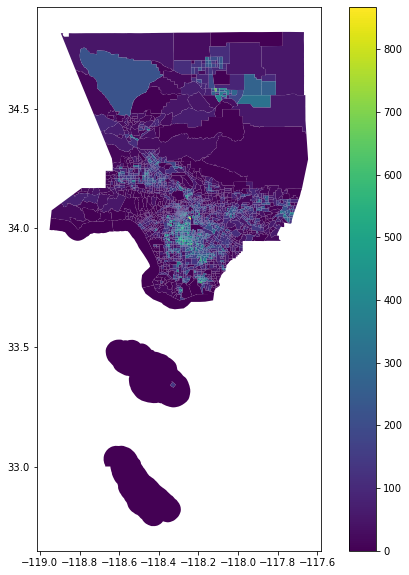

In [26]:
SNAP.plot(figsize=(10,10),column='Household received Food Stamps/SNAP',legend=True)

This map depicts the amount of households that recieve SNAP/ Food stamps by population. Therefore, this is not comparative as the population and percentage of people that recieve SNAP varies everywhere. 

In [27]:
SNAP['Percent Household received Food Stamps/SNAP'] = SNAP ['Household received Food Stamps/SNAP'] / SNAP['Total']*100
SNAP['Percent Recieve SNAP, Income below poverty level'] = SNAP ['Recieve SNAP, Income below poverty level'] / SNAP['Total']*100
SNAP['Percent Recieve SNAP, Income at or above poverty level'] = SNAP ['Recieve SNAP, Income at or above poverty level'] / SNAP['Total']*100
SNAP['Percent Household did not receive Food Stamps/SNAP in the past 12 months'] = SNAP ['Household did not receive Food Stamps/SNAP in the past 12 months'] / SNAP['Total']*100
SNAP['Percent Do Not recieve SNAP, Income below poverty level'] = SNAP ['Do Not recieve SNAP, Income below poverty level'] / SNAP['Total']*100
SNAP['Percent Do Not recieve SNAP, Income at or above poverty level'] = SNAP ['Do Not recieve SNAP, Income at or above poverty level'] / SNAP['Total']*100

Above, I am creating new columns that depict the percentage of each category to the total number of households in each census tract. 

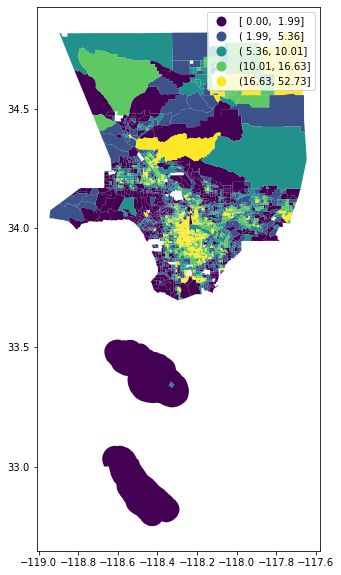

In [30]:
SNAP.plot(figsize=(10,10),
         column='Percent Household received Food Stamps/SNAP',
         legend=True,
         scheme='quantiles')

The above map depict the percentage of households receive snap in each census tract.

Text(0.5, 1.0, 'Percent Household did not receive SNAP')

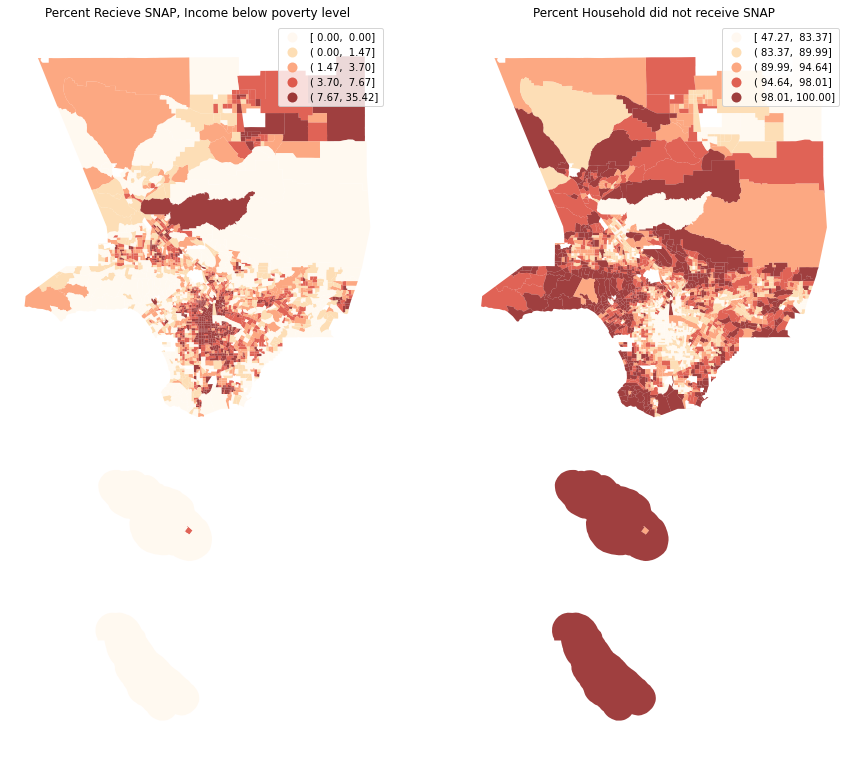

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
SNAP.plot(column='Percent Recieve SNAP, Income below poverty level', 
            cmap='OrRd', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Recieve SNAP, Income below poverty level")

# spatial lag map on the right
SNAP.plot(column='Percent Household did not receive Food Stamps/SNAP in the past 12 months', 
            cmap='OrRd', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Household did not receive SNAP")

The maps above compare the percentage of households that have income below the poverty level and utilize SNAP with the percentage of households that do not receive SNAP. This shows where in LA county, households tend to be lower income and depend on food stamps. 

Text(0.5, 1.0, 'Percent Recieve SNAP, Income at or above poverty level')

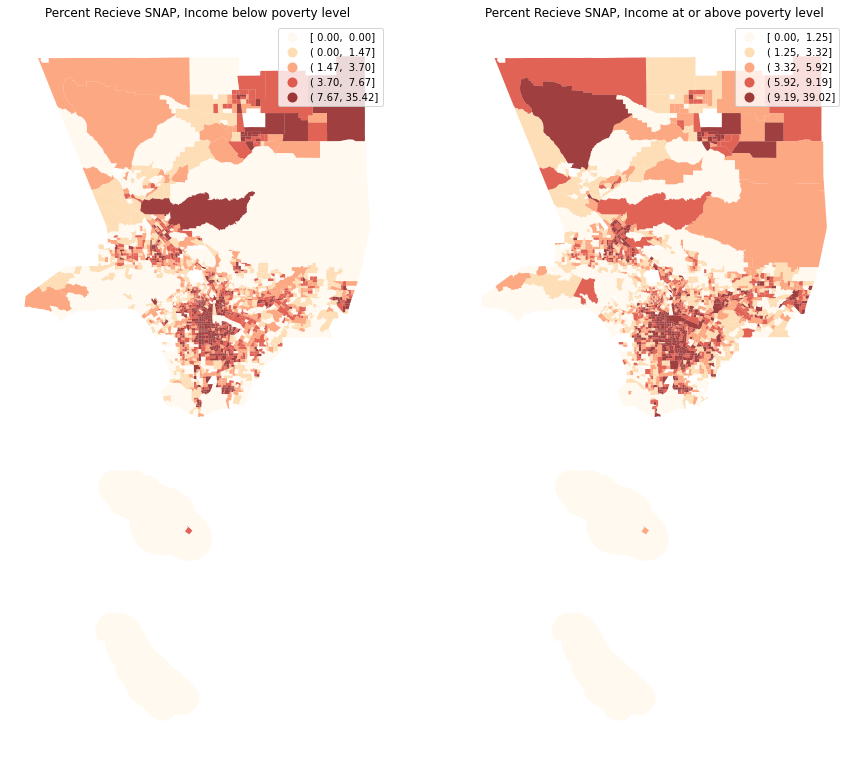

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
SNAP.plot(column='Percent Recieve SNAP, Income below poverty level', 
            cmap='OrRd', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Recieve SNAP, Income below poverty level")

# spatial lag map on the right
SNAP.plot(column='Percent Recieve SNAP, Income at or above poverty level', 
            cmap='OrRd', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Recieve SNAP, Income at or above poverty level")

The two maps above depict a map of the households that recieve SNAP and compare those who are at or above the poverty level with those below the poverty level. This shows that there is a large population of households that utilize SNAP and are at  or above the poverty level, demonstrating how food insecurity is an issue that does not only affect those in poverty and many people demonstrate a lack in basic needs.

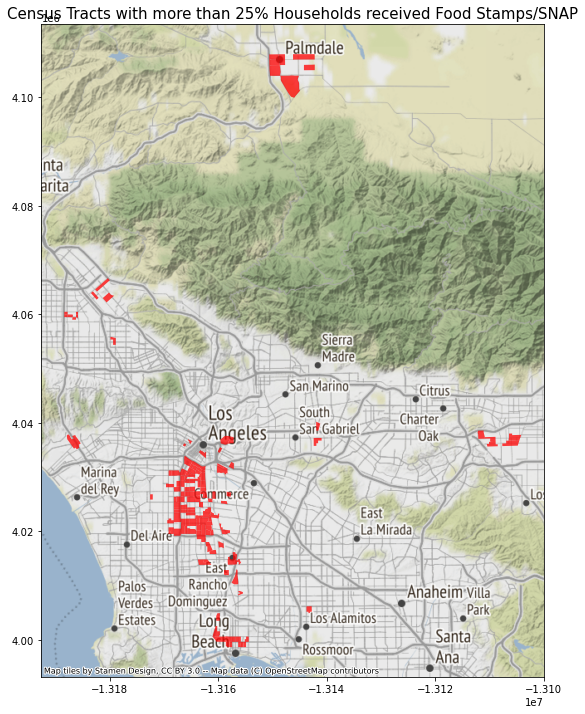

In [66]:
SNAP_web_mercator = SNAP.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12,12))

SNAP_web_mercator[SNAP_web_mercator['Percent Household received Food Stamps/SNAP'] > 25].plot(ax=ax, alpha=.75, color="red")

ax.set_title("Census Tracts with more than 25% Households received Food Stamps/SNAP", fontsize=15)

ctx.add_basemap(ax)

The map above depicts areas in LA county where 25% or more of the households receive SNAP.